<a href="https://colab.research.google.com/github/Srujanasri6/pandas-practice-/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
file_path = "/Learner_Raw.xlsx"
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['in']


In [6]:
df = xls.parse(xls.sheet_names[0])
print("Column Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nNull Values:\n", df.isnull().sum())
print("\nSummary:\n", df.describe(include='all'))

Column Names: ['learner_id', 'country', 'degree', 'institution', 'major']

Data Types:
 learner_id     object
country        object
degree         object
institution    object
major          object
dtype: object

Null Values:
 learner_id         0
country         2275
degree         52693
institution    53073
major          52871
dtype: int64

Summary:
                                           learner_id country  \
count                                         129259  126984   
unique                                        129259     190   
top     Learner#ffd4214b-cdcd-40bc-bec9-b045c3d1ba7b   India   
freq                                               1   33868   

                  degree             institution             major  
count              76566                   76186             76388  
unique                 7                   34563              4501  
top     Graduate Student  Saint Louis University  Computer Science  
freq               31806                    216

In [10]:
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['source', 'notes', 'origin']):
        print(f"\nUnique values in '{col}':")
        print(df[col].dropna().unique())

timestamp_cols = [col for col in df.columns if any(word in col.lower() for word in ['time', 'date', 'updated', 'created'])]
print("\nTime-related fields:", timestamp_cols)

if timestamp_cols:
    print("\nSample timestamps:")
    print(df[timestamp_cols[0]].dropna().sample(5))

for col in df.columns:
    print(f"\nSample values from '{col}':")
    print(df[col].dropna().sample(min(5, len(df[col].dropna()))))


Time-related fields: []

Sample values from 'learner_id':
49035     Learner#62ef6da1-8d6e-4513-a41d-59714d9eb79c
117722    Learner#edc026af-be98-4437-bf15-ef211fc04f82
115815    Learner#e9c22d1d-b610-42a8-87c7-d26e54e32292
69646     Learner#8c4f465d-83b4-46d6-b53a-ed0615516b09
88066     Learner#b20fa283-fc79-49c8-921f-126b30839150
Name: learner_id, dtype: object

Sample values from 'country':
112926            India
34917           Nigeria
75008     United States
770               India
28196     United States
Name: country, dtype: object

Sample values from 'degree':
15000     Undergraduate Student
59770       High School Student
44522          Graduate Student
64472     Undergraduate Student
101008         Not in Education
Name: degree, dtype: object

Sample values from 'institution':
14455                                IUBAT
121795    A P Shah Institute of technology
111033                          IIT Madras
24424                            Ain shams
126819          Kenya Methodi

In [11]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).head(5))


--- learner_id ---
learner_id
Learner#ffd4214b-cdcd-40bc-bec9-b045c3d1ba7b    1
Learner#00004f18-8b86-4fe4-ad7e-6c8d988f5335    1
Learner#00006478-745f-49bf-b126-02584e830720    1
Learner#00010567-1336-433c-a941-a612b3d2fbb8    1
Learner#00011c80-0c5c-4601-9696-b3ca787e264f    1
Name: count, dtype: int64

--- country ---
country
India            33868
Nigeria          30696
Pakistan         14112
Kenya             8246
United States     7064
Name: count, dtype: int64

--- degree ---
degree
NaN                      52693
Graduate Student         31806
Undergraduate Student    30709
Not in Education          6319
High School Student       4109
Name: count, dtype: int64

--- institution ---
institution
NaN                                 53073
Saint Louis University               2163
University of Lagos                   605
Illinois Institute of Technology      553
University of Ghana                   524
Name: count, dtype: int64

--- major ---
major
NaN                              

In [12]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [13]:
print("\nUnique value counts per column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique value counts per column:

learner_id: 129259 unique values
country: 190 unique values
degree: 7 unique values
institution: 34563 unique values
major: 4501 unique values


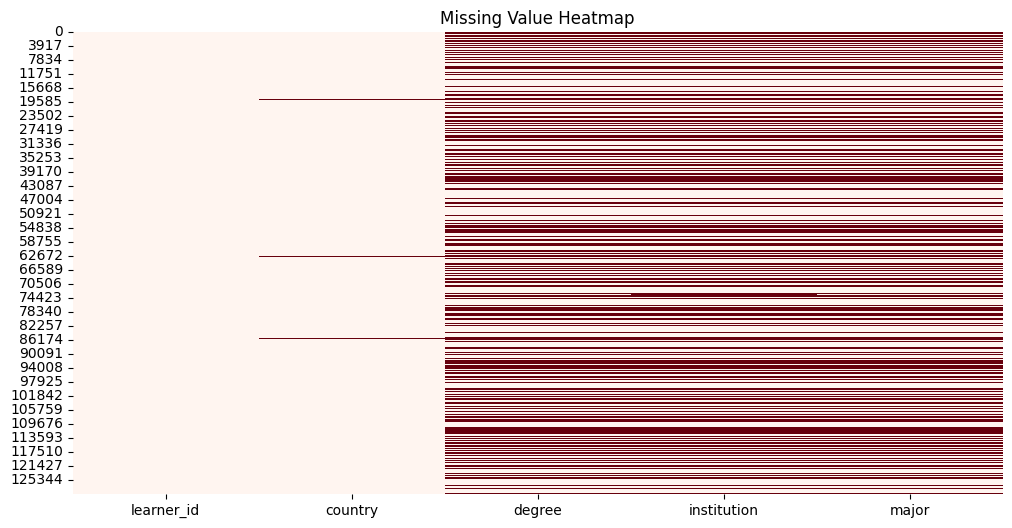

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Value Heatmap")
plt.show()

<ipython-input-16-8a474332e152>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette='Reds_r')


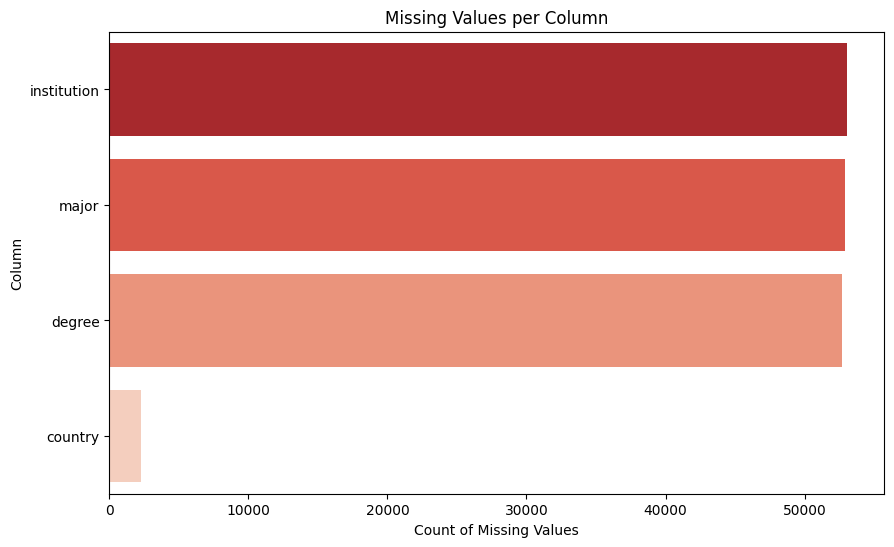

In [16]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values, y=missing.index, palette='Reds_r')
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Column")
plt.show()

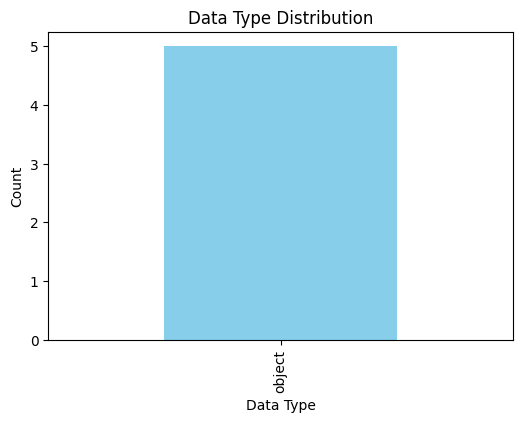

In [17]:
type_counts = df.dtypes.value_counts()

plt.figure(figsize=(6, 4))
type_counts.plot(kind='bar', color='skyblue')
plt.title("Data Type Distribution")
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.show()

<ipython-input-18-c9baec704779>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.values, y=unique_counts.index, palette='Blues_d')


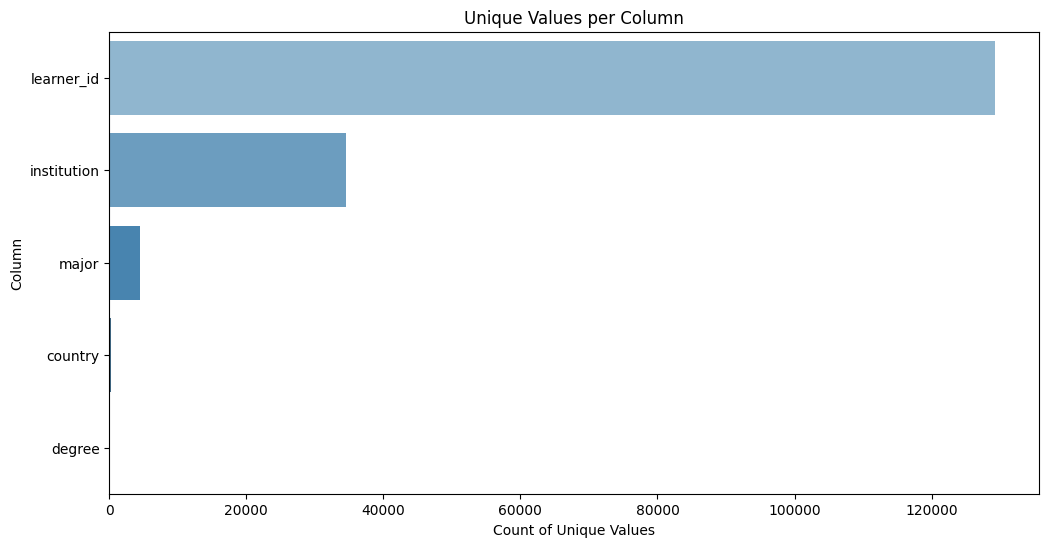

In [18]:
unique_counts = df.nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=unique_counts.values, y=unique_counts.index, palette='Blues_d')
plt.title("Unique Values per Column")
plt.xlabel("Count of Unique Values")
plt.ylabel("Column")
plt.show()

<ipython-input-22-a55f5bd454c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.values, y=top_vals.index, palette='viridis')


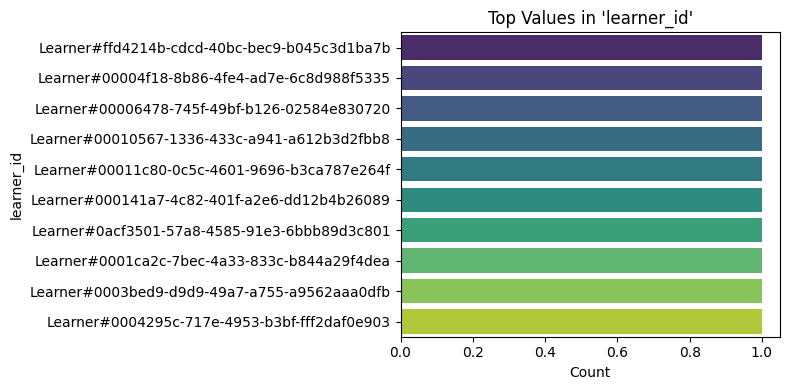

<ipython-input-22-a55f5bd454c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.values, y=top_vals.index, palette='viridis')


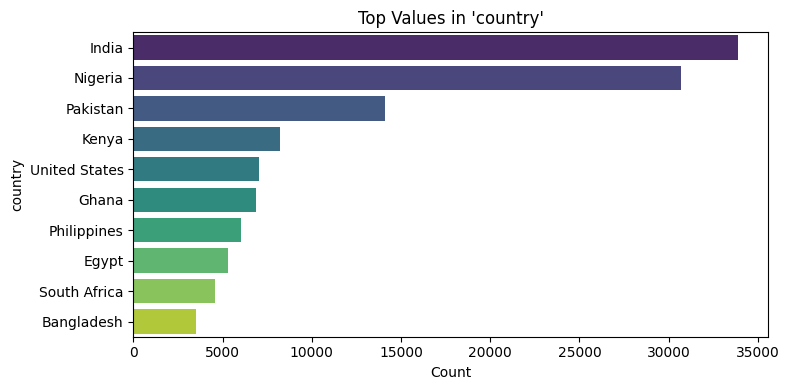

<ipython-input-22-a55f5bd454c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.values, y=top_vals.index, palette='viridis')


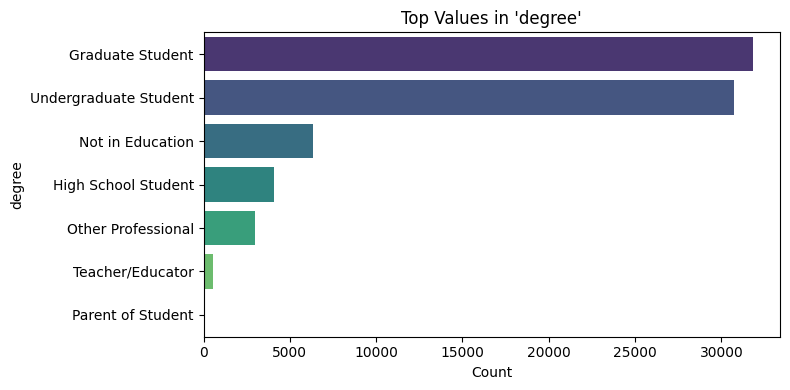

<ipython-input-22-a55f5bd454c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.values, y=top_vals.index, palette='viridis')


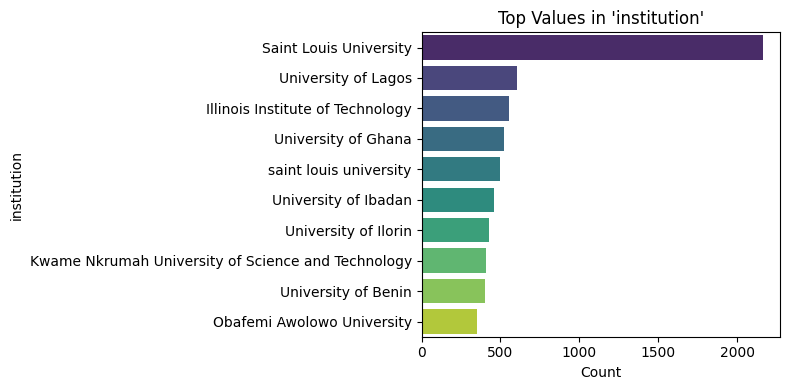

<ipython-input-22-a55f5bd454c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.values, y=top_vals.index, palette='viridis')


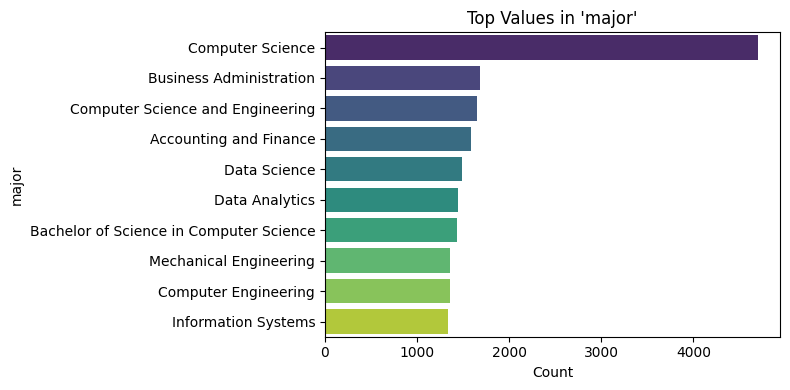

In [22]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    top_vals = df[col].value_counts().nlargest(10)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_vals.values, y=top_vals.index, palette='viridis')
    plt.title(f"Top Values in '{col}'")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [23]:
import pandas as pd

file_path = "/Learner_Raw.xlsx"
df = pd.read_excel(file_path)

summary = []

for col in df.columns:
    data_type = df[col].dtype
    unique_vals = df[col].nunique()
    nulls = df[col].isnull().sum()
    example = df[col].dropna().unique()[:3]

    if data_type == object and unique_vals < 50:
        inferred_type = 'Categorical'
    elif pd.api.types.is_numeric_dtype(df[col]):
        inferred_type = 'Numerical'
    elif 'date' in col.lower() or 'time' in col.lower():
        inferred_type = 'Date/Time'
    else:
        inferred_type = 'Text'

    summary.append({
        'Column': col,
        'Inferred Type': inferred_type,
        'Data Type': str(data_type),
        'Unique Values': unique_vals,
        'Missing Values': nulls,
        'Example Values': example
    })

col_summary = pd.DataFrame(summary)
col_summary


,Column,Inferred Type,Data Type,Unique Values,Missing Values,Example Values
0,learner_id,Text,object,129259,0,"[Learner#00004f18-8b86-4fe4-ad7e-6c8d988f5335,..."
1,country,Text,object,190,2275,"[Nigeria, Kenya, Bangladesh]"
2,degree,Categorical,object,7,52693,"[Undergraduate Student, Graduate Student, High..."
3,institution,Text,object,34563,53073,"[Federal University of Technology Owerru, UNIC..."
4,major,Text,object,4501,52871,"[Civil Engineering, Environmental Sustainabili..."


In [25]:
learner_df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])
learner_df.info()
learner_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129259 entries, 0 to 129258
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   learner_id   129259 non-null  object
 1   country      126984 non-null  object
 2   degree       76566 non-null   object
 3   institution  76186 non-null   object
 4   major        76388 non-null   object
dtypes: object(5)
memory usage: 4.9+ MB


,learner_id,country,degree,institution,major
0,Learner#00004f18-8b86-4fe4-ad7e-6c8d988f5335,Nigeria,Undergraduate Student,Federal University of Technology Owerru,Civil Engineering
1,Learner#00006478-745f-49bf-b126-02584e830720,Nigeria,NaN,NaN,NaN
2,Learner#00010567-1336-433c-a941-a612b3d2fbb8,Kenya,Graduate Student,UNICAF UNIVERSITY,Environmental Sustainability
3,Learner#00011c80-0c5c-4601-9696-b3ca787e264f,Bangladesh,NaN,NaN,NaN
4,Learner#000141a7-4c82-401f-a2e6-dd12b4b26089,Nigeria,NaN,NaN,NaN


In [29]:
learner_df.to_csv("Cleaned_Learner_Data.csv", index=False)
print("\n Cleaned data saved as 'Cleaned_Learner_Data.csv'")


 Cleaned data saved as 'Cleaned_Learner_Data.csv'


In [30]:
from google.colab import files
files.download("Cleaned_Learner_Data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>